# Python Group Project 4조

## 구성원
- 김윤경
- 김이준
- 이성준
- 최민서


## 패키지 및 데이터 임포트

In [ ]:
# python package import
import pandas as pd
import seaborn as sns
sns.set_context("paper", rc={"figure.figsize": (8, 6)}) #차트 사이즈 조정

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# csv 파일을 데이터 프레임으로 저장
humid_raw = pd.read_csv("./data/기상청/18-22 월별 습도.csv", encoding='cp949')
temp_raw = pd.read_csv("./data/기상청/18-22 월별 온도.csv", encoding='cp949')
prec_raw = pd.read_csv("./data/기상청/강수량 2018-2022 월별.csv", encoding='cp949')

## 데이터 전처리 - 기상청 날씨 데이터
### 1. 습도

In [ ]:
# 데이터 전처리 - 습도
del humid_raw[humid_raw.columns[0]] # 불필요한 1행 제거
humid_raw = humid_raw.dropna(how="all") # nan이 포함된 행 삭제
print(humid_raw, end="\n\n")
print(humid_raw.info())

   지점명      일시  평균습도(%rh)  최저습도(%rh)
0   서울  Jan-18       48.0       16.0
1   서울  Feb-18       45.0       13.0
2   서울  Mar-18       59.0       13.0
3   서울  Apr-18       55.0        8.0
4   서울  May-18       63.0       22.0
5   서울  Jun-18       63.0       19.0
6   서울  Jul-18       68.0       29.0
7   서울  Aug-18       65.0       25.0
8   서울  Sep-18       61.0       23.0
9   서울  Oct-18       59.0       16.0
10  서울  Nov-18       58.0       12.0
11  서울  Dec-18       46.0       16.0
12  서울  Jan-19       46.0       11.0
13  서울  Feb-19       47.0       15.0
14  서울  Mar-19       51.0       10.0
15  서울  Apr-19       51.0       10.0
16  서울  May-19       47.0       12.0
17  서울  Jun-19       61.0       22.0
18  서울  Jul-19       69.0       24.0
19  서울  Aug-19       69.0       28.0
20  서울  Sep-19       65.0       24.0
21  서울  Oct-19       62.0       23.0
22  서울  Nov-19       56.0       14.0
23  서울  Dec-19       58.0       17.0
24  서울  Jan-20       56.0       17.0
25  서울  Feb-20       58.0       14.0
2

In [ ]:
# 일시 데이터를 년도별 월별로 분류
date_raw = humid_raw["일시"].str.split("-")

month = []
year = []

for i in range(len(date_raw)):
    month.append(date_raw[i][0])
    year.append("20"+date_raw[i][1])

humid_raw["년"] = year
humid_raw["월"] = month


In [ ]:
# 불필요한 컬럼 제거
del humid_raw["일시"]
del humid_raw["최저습도(%rh)"] # 평균 습도만 사용 예정으로 최저 습도 컬럼 삭제

In [ ]:
# 컬럼 순서 및 이름 변경
humid_raw = humid_raw[["지점명", "년", "월", "평균습도(%rh)"]] # 컬럼 순서 변경
humid_raw = humid_raw.rename(columns={"지점명":"지역"}) # 컬럼 이름 변경
humid_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지역         60 non-null     object 
 1   년          60 non-null     object 
 2   월          60 non-null     object 
 3   평균습도(%rh)  60 non-null     float64
dtypes: float64(1), object(3)
memory usage: 4.4+ KB


In [ ]:
# 데이터 티입 변경
# 년 / 월 > datetime
humid_raw['년'] = pd.to_datetime(humid_raw['년'], format='%Y').dt.year
humid_raw['월'] = pd.to_datetime(humid_raw['월'], format="%b").dt.month

In [ ]:
# 2018년, 2019년 데이터 삭제
humid_raw = humid_raw.loc[humid_raw["년"] >= 2020]
humid_raw = humid_raw.reset_index(drop=True) # 인덱스 재정렬

In [ ]:
humid_raw
# humid_raw.info()

,지역,년,월,평균습도(%rh)
0,서울,2020,1,56.0
1,서울,2020,2,58.0
2,서울,2020,3,46.0
3,서울,2020,4,50.0
4,서울,2020,5,67.0
5,서울,2020,6,68.0
6,서울,2020,7,77.0
7,서울,2020,8,85.0
8,서울,2020,9,71.0
9,서울,2020,10,61.0


### 2. 온도

In [ ]:
# 불필요한 컬럼 제거(평균최저기온, 평균최고기온)
del temp_raw["평균최저기온(℃)"]
del temp_raw["평균최고기온(℃)"]

In [ ]:
#NaN 값 제거
temp_raw = temp_raw.dropna()

In [ ]:
# 지점속 데이터를 서울로 변경
print(temp_raw["지점"].unique) #108.0 > 서울로 변경
temp_raw["지점"] = temp_raw["지점"].replace(108.0, "서울")

<bound method Series.unique of 0     108.0
1     108.0
2     108.0
3     108.0
4     108.0
      ...  
67    108.0
68    108.0
69    108.0
70    108.0
71    108.0
Name: 지점, Length: 72, dtype: float64>


In [ ]:
# 년월 분리 후 날짜로 변경
temp_raw["년월"] = temp_raw["년월"].replace("\t\t\t", "", regex=True)
date_raw = temp_raw["년월"].str.split("-")

month = []
year = []

for i in range(len(date_raw)):
    month.append(date_raw[i][1])
    year.append(date_raw[i][0])

temp_raw["년"] = year
temp_raw["월"] = month

In [ ]:
# 년월 컬럼 제거
del temp_raw["년월"]

In [ ]:
# 컬럼 순서 이름, 순서 변경 및 년, 월 데이터 타입 변경
temp_raw = temp_raw.rename(columns={"지점":"지역"}) # 컬럼 이름 변경
temp_raw = temp_raw[["지역", "년", "월", "평균기온(℃)"]]
temp_raw['년'] = pd.to_datetime(temp_raw['년'], format='%Y').dt.year
temp_raw['월'] = pd.to_datetime(temp_raw['월'], format="%m").dt.month

In [ ]:
# 2017, 2018, 2019년 데이터 삭제
temp_raw = temp_raw.loc[temp_raw["년"] >= 2020]
temp_raw = temp_raw.reset_index(drop=True)

In [ ]:
temp_raw

,지역,년,월,평균기온(℃)
0,서울,2020,1,1.6
1,서울,2020,2,2.5
2,서울,2020,3,7.7
3,서울,2020,4,11.1
4,서울,2020,5,18.0
5,서울,2020,6,23.9
6,서울,2020,7,24.1
7,서울,2020,8,26.5
8,서울,2020,9,21.4
9,서울,2020,10,14.3


### 3. 강수량

In [ ]:
# na 값 제거
prec_raw = prec_raw.dropna()

In [ ]:
# 지점속 데이터를 서울로 변경
print(prec_raw["지점"].unique) #108 > 서울로 변경
prec_raw["지점"] = prec_raw["지점"].replace(108, "서울")

<bound method Series.unique of 0     108
1     108
2     108
3     108
4     108
5     108
6     108
7     108
8     108
9     108
10    108
11    108
12    108
13    108
14    108
15    108
16    108
17    108
18    108
19    108
20    108
21    108
22    108
23    108
24    108
25    108
26    108
27    108
28    108
29    108
30    108
31    108
32    108
33    108
34    108
35    108
36    108
37    108
38    108
39    108
40    108
41    108
42    108
43    108
44    108
45    108
46    108
47    108
48    108
49    108
50    108
51    108
52    108
53    108
54    108
55    108
56    108
57    108
58    108
59    108
Name: 지점, dtype: int64>


In [ ]:
# 년월 분리 후 날짜로 변경
date_raw = prec_raw["년월"].str.split("-")

month = []
year = []

for i in range(len(date_raw)):
    month.append(date_raw[i][0])
    year.append("20"+date_raw[i][1])

prec_raw["년"] = year
prec_raw["월"] = month

In [ ]:
# 년월 컬럼 삭제
del prec_raw["년월"]

In [ ]:
# 컬럼 순서 및 이름 변경
prec_raw = prec_raw[["지점", "년", "월", "강수량(mm)"]] # 컬럼 순서 변경
prec_raw = prec_raw.rename(columns={"지점":"지역"}) # 컬럼 이름 변경

In [ ]:
# 데이터 티입 변경
# 년 / 월 > datetime
prec_raw['년'] = pd.to_datetime(prec_raw['년'], format='%Y').dt.year
prec_raw['월'] = pd.to_datetime(prec_raw['월'], format="%b").dt.month

In [ ]:
# 2018년, 2019년 데이터 삭제
prec_raw = prec_raw.loc[prec_raw["년"] >= 2020]
prec_raw = prec_raw.reset_index(drop=True)

In [ ]:
prec_raw

,지역,년,월,강수량(mm)
0,서울,2020,1,60.5
1,서울,2020,2,53.1
2,서울,2020,3,16.3
3,서울,2020,4,16.9
4,서울,2020,5,112.4
5,서울,2020,6,139.6
6,서울,2020,7,270.4
7,서울,2020,8,675.7
8,서울,2020,9,181.5
9,서울,2020,10,0.0


### 년도 / 월 별 온도, 습도, 강수량 통합 데이터프레임

In [ ]:
# 지역, 년 월을 기준으로 데이터프레임 merge
frames = [temp_raw, humid_raw, prec_raw]
weather_df = pd.concat(frames, axis=1)

# 중복 컬럼 제거
weather_df = weather_df.loc[:,~weather_df.columns.duplicated()]

#지역 컬럼 제거 (추후 음주운전적발 데이터에서 구별로 세분화 예정)
del weather_df["지역"]

In [ ]:
weather_df

,년,월,평균기온(℃),평균습도(%rh),강수량(mm)
0,2020,1,1.6,56.0,60.5
1,2020,2,2.5,58.0,53.1
2,2020,3,7.7,46.0,16.3
3,2020,4,11.1,50.0,16.9
4,2020,5,18.0,67.0,112.4
5,2020,6,23.9,68.0,139.6
6,2020,7,24.1,77.0,270.4
7,2020,8,26.5,85.0,675.7
8,2020,9,21.4,71.0,181.5
9,2020,10,14.3,61.0,0.0


## 연도별, 월별 음주음전 적발 기록, 사건사고 기록 데이터 프레임

In [ ]:
# 음주운전 적발 기록 csv read
raw_2020_01 = pd.read_csv("./data/음주운전적발기록/경찰청_음주운전적발기록_20200518.csv", encoding='cp949')
raw_2020_02 = pd.read_csv("./data/음주운전적발기록/경찰청_음주운전적발기록_20200401~20201231.csv", encoding='utf16', sep="\t")
raw_2021 = pd.read_csv("./data/음주운전적발기록/경찰청_음주운전적발기록_20211231.csv", encoding='utf16', sep="\t")
raw_2022 = pd.read_csv("./data/음주운전적발기록/경찰청_음주운전_20221231.csv", encoding='cp949')

In [ ]:
#2020년 1분기 데이터에서 측정거부여부와 연번 제거
del raw_2020_01["연번"]
del raw_2020_01["측정거부여부"]

In [ ]:
#2020 01 번 데이터 프레임의 알콜농도 컬럼에 스페이스바가 포함되어 있음
print(raw_2020_01.columns)

#데이터 프레임 concat을 위해 컬럼명 변명
raw_2020_01 = raw_2020_01.rename(columns={"알콜농도 ":"알콜농도"}) # 컬럼 이름 변경

Index(['성별', '적발횟수', '나이', '알콜농도 ', '측정일시', '관할경찰서'], dtype='object')


In [ ]:
# 2020년 기록을 행으로 결합해서 하나의 데이터 프레임 생성
raw_frames = [raw_2020_01, raw_2020_02]
raw_2020 = pd.concat(raw_frames, axis=0)

In [ ]:
# 적발 횟수 컬럼이 유의미 한가
raw_2020["적발횟수"].unique # 결과는 1만 존재
raw_2021["적발횟수"].unique # 결과는 1만 존재
raw_2022["적발횟수"].unique # 결과는 1만 존재

#따라서 불필요한 요소로 판단 - 제거
del raw_2020["적발횟수"]
del raw_2021["적발횟수"]
del raw_2022["적발횟수"]

In [ ]:
#프로젝트 목표 - 서울에서 발생한 음주 운전 건만을 다룸
#관할 경찰서 string에서 서울이라는 단어가 포함된 행만 남김

raw_2020 = raw_2020[raw_2020["관할경찰서"].str.contains("서울")]
raw_2021 = raw_2021[raw_2021["관할경찰서"].str.contains("서울")]
raw_2022 = raw_2022[raw_2022["관할경찰서"].str.contains("서울")]

In [ ]:
# 인덱스 재정렬
raw_2020 = raw_2020.reset_index(drop=True)
raw_2021 = raw_2021.reset_index(drop=True)
raw_2022 = raw_2022.reset_index(drop=True)

In [ ]:
# NA 값 여부 체크 후 해당 데이터 제거
print(raw_2020.isnull().sum(), end="\n\n") # 존재
print(raw_2021.isnull().sum(), end="\n\n") # 없음
print(raw_2022.isnull().sum(), end="\n\n") # 없음

mv = raw_2020[raw_2020.isnull().any(axis=1)].index # 결측치 인덱스 값 추출
raw_2020 = raw_2020.drop(mv) # NA포함 행 제거
print(raw_2020.isnull().sum(), end="\n\n") #na값 여부 재확인
raw_2020 = raw_2020.reset_index(drop=True) #인덱스 재정렬

성별       0
나이       1
알콜농도     0
측정일시     0
관할경찰서    0
dtype: int64

성별       0
나이       0
알콜농도     0
측정일시     0
관할경찰서    0
dtype: int64

성별       0
나이       0
알콜농도     0
측정일시     0
관할경찰서    0
dtype: int64

성별       0
나이       0
알콜농도     0
측정일시     0
관할경찰서    0
dtype: int64



In [ ]:
# 나이가 "불명"인 데이터 제거
print(raw_2020[raw_2020["나이"] == "불명"]) # 나이가 불명인 행 추출
print(raw_2021[raw_2021["나이"] == "불명"])
print(raw_2022[raw_2022["나이"] == "불명"])

mv_2_2020 = raw_2020[raw_2020["나이"] == "불명"].index # 인덱스 값 추출
mv_2_2021 = raw_2021[raw_2021["나이"] == "불명"].index
mv_2_2022 = raw_2022[raw_2022["나이"] == "불명"].index
#print(mv_2_2020)

raw_2020 = raw_2020.drop(mv_2_2020) #해당 행 제거
raw_2021 = raw_2021.drop(mv_2_2021)
raw_2022 = raw_2022.drop(mv_2_2022)

print(raw_2020[raw_2020["나이"] == "불명"]) # 나이 컬럼의 유일값 재확인
print(raw_2021[raw_2021["나이"] == "불명"])
print(raw_2022[raw_2022["나이"] == "불명"])

raw_2020 = raw_2020.reset_index(drop=True) #인덱스 재정렬
raw_2021 = raw_2021.reset_index(drop=True) #인덱스 재정렬
raw_2022 = raw_2022.reset_index(drop=True) #인덱스 재정렬

       성별  나이  알콜농도              측정일시    관할경찰서
12589  남자  불명  0.15  2020-12-16 00:54  서울구로경찰서
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 측정일시, 관할경찰서]
Index: []
       성별  나이   알콜농도                 측정일시    관할경찰서
10074  불명  불명  0.136  2022/09/01 03:52:00  서울강남경찰서
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 측정일시, 관할경찰서]
Index: []
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 측정일시, 관할경찰서]
Index: []
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 측정일시, 관할경찰서]
Index: []


In [ ]:
# 나이가 "측정거부"인 데이터를 평균값으로 대체
print(len(raw_2020[raw_2020["알콜농도"] == "측정거부"])) #알콜 농도가 측정 거부인 행의 갯수
print(len(raw_2021[raw_2021["알콜농도"] == "측정거부"]))
print(len(raw_2022[raw_2022["알콜농도"] == "측정거부"]))

mv_3_2020 = raw_2020[raw_2020["알콜농도"] == "측정거부"].index # 인덱스 값 추출
mv_3_2021 = raw_2021[raw_2021["알콜농도"] == "측정거부"].index
mv_3_2022 = raw_2022[raw_2022["알콜농도"] == "측정거부"].index
#print(mv_3_2020)

#### 평균값 대치
# 평균값 구하기
avg_2020 = round(raw_2020[raw_2020["알콜농도"]!="측정거부"]["알콜농도"].astype(float).mean(), 3)
avg_2021 = round(raw_2021[raw_2021["알콜농도"]!="측정거부"]["알콜농도"].astype(float).mean(), 3)
avg_2022 = round(raw_2022[raw_2022["알콜농도"]!="측정거부"]["알콜농도"].astype(float).mean(), 3)

# "측정거부"를 평균값으로 변경
raw_2020 = raw_2020.replace("측정거부", avg_2020)
raw_2021 = raw_2021.replace("측정거부", avg_2021)
raw_2022 = raw_2022.replace("측정거부", avg_2022)

print("[측정거부]가 포함된 행 재확인")
print(len(raw_2020[raw_2020["알콜농도"] == "측정거부"])) # 측정거부 행이 있는지 재확인
print(len(raw_2021[raw_2021["알콜농도"] == "측정거부"]))
print(len(raw_2022[raw_2022["알콜농도"] == "측정거부"]))

0
0
0
[측정거부]가 포함된 행 재확인
0
0
0


In [ ]:
# 데이터 형식 변경
'''
성별 - (카데고리 변수) 남 / 녀
나이 - 정수형
알콜농도 - 실수형
측정 일시 - 날짜형
'''
#2020년
raw_2020["성별"] = raw_2020["성별"].astype("category")
raw_2020["나이"] = raw_2020["나이"].astype("int")
raw_2020["알콜농도"] = raw_2020["알콜농도"].astype("float")
raw_2020["측정일시"] = pd.to_datetime(raw_2020["측정일시"])
#2021년
raw_2021["성별"] = raw_2021["성별"].astype("category")
raw_2021["나이"] = raw_2021["나이"].astype("int")
raw_2021["알콜농도"] = raw_2021["알콜농도"].astype("float")
raw_2021["측정일시"] = pd.to_datetime(raw_2021["측정일시"])
#2022년
raw_2022["성별"] = raw_2022["성별"].astype("category")
raw_2022["나이"] = raw_2022["나이"].astype("int")
raw_2022["알콜농도"] = raw_2022["알콜농도"].astype("float")
raw_2022["측정일시"] = pd.to_datetime(raw_2022["측정일시"])

In [ ]:
# 측정일시 년 월 컬럼 생성 / "측정 일시" 컬럼 삭제
#2020년
raw_2020['년'] = raw_2020['측정일시'].dt.year
raw_2020['월'] = raw_2020['측정일시'].dt.month
del raw_2020["측정일시"]
#2021년
raw_2021['년'] = raw_2021['측정일시'].dt.year
raw_2021['월'] = raw_2021['측정일시'].dt.month
del raw_2021["측정일시"]
#2022년
raw_2022['년'] = raw_2022['측정일시'].dt.year
raw_2022['월'] = raw_2022['측정일시'].dt.month
del raw_2022["측정일시"]

In [ ]:
# 2020, 2021, 2022 데이터 merge
frames = [raw_2020, raw_2021, raw_2022]
DUI_raw = pd.concat(frames)
DUI_raw = DUI_raw.reset_index(drop=True) #인덱스 재정렬

In [ ]:
#컬럼 순서 변경
DUI_raw = DUI_raw[["년", "월", "성별", "알콜농도", "관할경찰서"]]

In [ ]:
DUI_raw

,년,월,성별,알콜농도,관할경찰서
0,2020,1,남자,0.210,서울마포경찰서
1,2020,1,남자,0.091,서울용산경찰서
2,2020,1,남자,0.115,서울양천경찰서
3,2020,1,남자,0.119,서울노원경찰서
4,2020,1,남자,0.075,서울강북경찰서
...,...,...,...,...,...
40862,2022,12,남자,0.059,서울강동경찰서
40863,2022,12,남자,0.183,서울강서경찰서
40864,2022,12,남자,0.078,서울영등포경찰서
40865,2022,12,남자,0.139,서울마포경찰서


## 최종 데이터베이스

In [ ]:
# DUI와 Weather data merge
total_df = pd.merge(DUI_raw, weather_df, left_on=["년", "월"], right_on=["년", "월"], how="left")
total_df

,년,월,성별,알콜농도,관할경찰서,평균기온(℃),평균습도(%rh),강수량(mm)
0,2020,1,남자,0.210,서울마포경찰서,1.6,56.0,60.5
1,2020,1,남자,0.091,서울용산경찰서,1.6,56.0,60.5
2,2020,1,남자,0.115,서울양천경찰서,1.6,56.0,60.5
3,2020,1,남자,0.119,서울노원경찰서,1.6,56.0,60.5
4,2020,1,남자,0.075,서울강북경찰서,1.6,56.0,60.5
...,...,...,...,...,...,...,...,...
40862,2022,12,남자,0.059,서울강동경찰서,-2.8,59.0,13.6
40863,2022,12,남자,0.183,서울강서경찰서,-2.8,59.0,13.6
40864,2022,12,남자,0.078,서울영등포경찰서,-2.8,59.0,13.6
40865,2022,12,남자,0.139,서울마포경찰서,-2.8,59.0,13.6


In [ ]:
# 관할구 리스트 생성
sector = {
    "강남구" : ["서울강남경찰서", "서울수서경찰서"],
    "서초구" : [ "서울서초경찰서", "서울방배경찰서"],
    "성북구" : [ "서울성북경찰서", "서울종암경찰서"],
    "은평구" : ["서울서부경찰서", "서울은평경찰서"],
    "종로구" : ["서울종로경찰서", "서울혜화경찰서", "서울특별시경찰청"],
    "중구" : ["서울중부경찰서", "서울남대문경찰서"]
}
new_sector = []
for police in total_df["관할경찰서"]:
    if any(police in sub for sub in sector.values()):
        for k, v in sector.items():
            if police in v:
                new_sector.append(k)
    else:
        new_sector.append(police[2:-3]+"구")


In [ ]:
# 관할구 컬럼 생성 및 컬럼 순서 변경
total_df["관할구"] = new_sector
total_df
total_df = total_df[["년", "월", "성별", "알콜농도", "관할경찰서", "관할구", "평균기온(℃)", "평균습도(%rh)", "강수량(mm)"]]

In [ ]:
# 최종 데이터베이스 데이터 타입 확인
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40863 entries, 0 to 40866
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년          40863 non-null  int32  
 1   월          40863 non-null  int32  
 2   성별         40863 non-null  int64  
 3   알콜농도       40863 non-null  float64
 4   관할경찰서      40863 non-null  object 
 5   관할구        40863 non-null  object 
 6   평균기온(℃)    40863 non-null  float64
 7   평균습도(%rh)  40863 non-null  float64
 8   강수량(mm)    40863 non-null  float64
dtypes: float64(4), int32(2), int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
# 성별 데이터 타입 변경을 category로 변경이 필요
# 따라서 성별의 unique를 확인
print(total_df["성별"].unique())
total_df[total_df["성별"]=="불명"] #성별이 불명인 행 확인

['남자' '여자' '불명']


,년,월,성별,알콜농도,관할경찰서,관할구,평균기온(℃),평균습도(%rh),강수량(mm)
3001,2020,4,불명,0.146,서울구로경찰서,구로구,11.1,50.0,16.9
14308,2021,2,불명,0.030,서울송파경찰서,송파구,2.7,56.0,7.1
20387,2021,8,불명,0.082,서울구로경찰서,구로구,25.9,74.0,211.2
23272,2021,11,불명,0.094,서울금천경찰서,금천구,8.2,68.0,62.4


In [ ]:
# 성별이 불명인 인덱스 추출
unknown_sex = total_df[total_df["성별"] == "불명"].index
total_df = total_df.drop(unknown_sex)
print(total_df["성별"].unique()) # 성별이 불명인 행이 존재하는지 재확인

['남자' '여자']


In [ ]:
# 성별 데이터 타입을 카테고리 타입을 변경
# 여자 = 0, 남자 = 1
total_df['성별'] = total_df['성별'].map({'여자': 0, '남자': 1})

In [ ]:
total_df

,년,월,성별,알콜농도,관할경찰서,관할구,평균기온(℃),평균습도(%rh),강수량(mm)
0,2020,1,1,0.210,서울마포경찰서,마포구,1.6,56.0,60.5
1,2020,1,1,0.091,서울용산경찰서,용산구,1.6,56.0,60.5
2,2020,1,1,0.115,서울양천경찰서,양천구,1.6,56.0,60.5
3,2020,1,1,0.119,서울노원경찰서,노원구,1.6,56.0,60.5
4,2020,1,1,0.075,서울강북경찰서,강북구,1.6,56.0,60.5
...,...,...,...,...,...,...,...,...,...
40862,2022,12,1,0.059,서울강동경찰서,강동구,-2.8,59.0,13.6
40863,2022,12,1,0.183,서울강서경찰서,강서구,-2.8,59.0,13.6
40864,2022,12,1,0.078,서울영등포경찰서,영등포구,-2.8,59.0,13.6
40865,2022,12,1,0.139,서울마포경찰서,마포구,-2.8,59.0,13.6


## heatmap(상관관계표)

In [ ]:
# 월별 기준상관관계 확인을 위한 별도의 데이터 프레임 생성
corr_df = total_df

In [ ]:
#월별 음주 적발 건수 추가
DUI_count = list(corr_df.groupby(["년", "월"])["알콜농도"].count())

In [ ]:
# 데이터 프레임 조정 및 음주 적발 건수 추가
corr_df = corr_df.groupby(["년", "월"]).agg({"알콜농도":"mean", "평균기온(℃)":"mean", "평균습도(%rh)":"mean", "강수량(mm)":"mean"}).reset_index()
corr_df["음주적발건수(건)"] = DUI_count
corr_df

,년,월,알콜농도,평균기온(℃),평균습도(%rh),강수량(mm),음주적발건수(건)
0,2020,1,0.110935,1.6,56.0,60.5,921
1,2020,2,0.115705,2.5,58.0,53.1,958
2,2020,3,0.117491,7.7,46.0,16.3,997
3,2020,4,0.119924,11.1,50.0,16.9,1070
4,2020,5,0.126684,18.0,67.0,112.4,1174
5,2020,6,0.129631,23.9,68.0,139.6,1154
6,2020,7,0.131876,24.1,77.0,270.4,1237
7,2020,8,0.137948,26.5,85.0,675.7,1159
8,2020,9,0.133968,21.4,71.0,181.5,1156
9,2020,10,0.117317,14.3,61.0,0.0,1196


In [ ]:
import matplotlib
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/NanumMyeongjo.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'NanumMyeongjo' not found.
c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'NanumMyeongjo' not found.
c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.draw()
c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from current font.
  fig.canvas.draw()
c:\Users\SJLEE\AppData\Local\Progr

c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.draw()
c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.draw()
c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.draw()
c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.draw()
c:\Users\SJLEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'NanumMyeongjo' n

['NanumMyeongjo']


findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

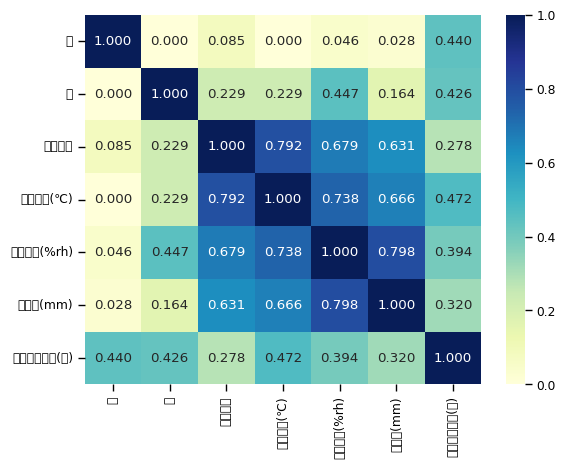

In [ ]:
plt.rc('font', family='NanumMyeongjo') # For Windows
print(plt.rcParams['font.family'])
sns.heatmap(corr_df.corr(), cmap='YlGnBu', annot=True, fmt=".3f")
plt.show()

## heatmap(total_df)

In [ ]:
#관할경찰서, 관할구를 제외한 별도의 데이터프레임 생성
heatmap_df = total_df
del heatmap_df["관할경찰서"]
del heatmap_df["관할구"]
heatmap_df

,년,월,성별,알콜농도,평균기온(℃),평균습도(%rh),강수량(mm)
0,2020,1,1,0.210,1.6,56.0,60.5
1,2020,1,1,0.091,1.6,56.0,60.5
2,2020,1,1,0.115,1.6,56.0,60.5
3,2020,1,1,0.119,1.6,56.0,60.5
4,2020,1,1,0.075,1.6,56.0,60.5
...,...,...,...,...,...,...,...
40862,2022,12,1,0.059,-2.8,59.0,13.6
40863,2022,12,1,0.183,-2.8,59.0,13.6
40864,2022,12,1,0.078,-2.8,59.0,13.6
40865,2022,12,1,0.139,-2.8,59.0,13.6


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/

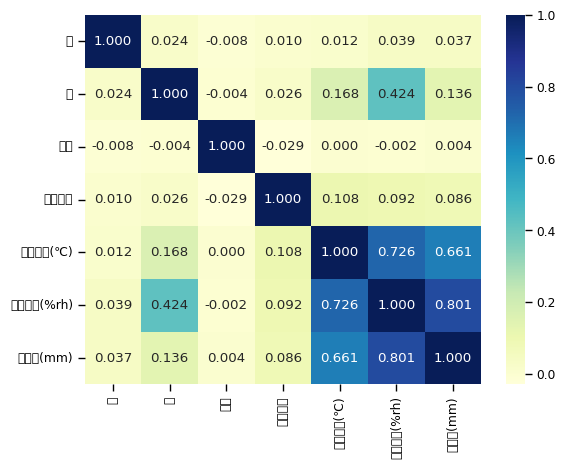

In [ ]:
# seaborn 패키지를 사용해서 heatmap 생성
sns.heatmap(heatmap_df.corr(), cmap='YlGnBu', annot=True, fmt=".3f")
plt.show()

## 데이터베이스 기본통계수치

In [ ]:
#월별 통계수치표
round(corr_df.describe(), 2)

,년,월,알콜농도,평균기온(℃),평균습도(%rh),강수량(mm),음주적발건수(건)
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,2021.00,6.50,0.12,13.39,64.50,128.14,1135.08
std,0.83,3.50,0.01,9.93,8.93,151.86,199.28
min,2020.00,1.00,0.11,-2.80,46.00,0.00,761.00
25%,2020.00,3.75,0.12,6.45,57.50,16.75,1006.75
50%,2021.00,6.50,0.12,14.45,64.50,103.60,1142.50
75%,2022.00,9.25,0.13,22.65,71.00,171.60,1259.25
max,2022.00,12.00,0.14,28.10,85.00,675.70,1526.00


# 민서님:
* 알콜농도 - 평균기온
* 알콜농도 - 평균습도
* 알콜농도 - 강수량
* 음주적발건수 - 평균기온

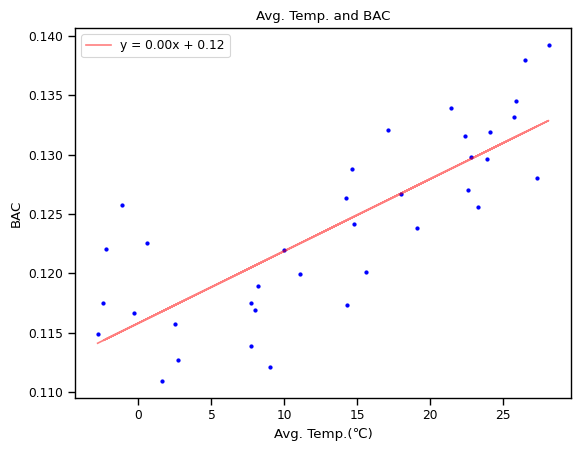

In [ ]:
# 알콜농도 - 평균기온

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

corr_df = corr_df.groupby(["년", "월"]).agg({"알콜농도":"mean", "평균기온(℃)":"mean", "평균습도(%rh)":"mean", "강수량(mm)":"mean"}).reset_index()
corr_df["음주적발건수(건)"] = DUI_count

# DataFrame named total_df with columns 'x_column' and 'y_column'
x_data = corr_df['평균기온(℃)']
y_data = corr_df['알콜농도']

# Create the scatterplot
plt.scatter(x_data, y_data, color='blue', marker='o', s=5)

# Create the line
m, b = np.polyfit(x_data, y_data, 1)
line_equation = f'y = {m:.2f}x + {b:.2f}'
plt.plot(x_data, m*x_data+b, color='r', alpha=0.5, label=line_equation)

plt.title('Avg. Temp. and BAC')
plt.xlabel('Avg. Temp.(℃)')
plt.ylabel('BAC')

# Display the scatterplot
plt.legend()
plt.show()

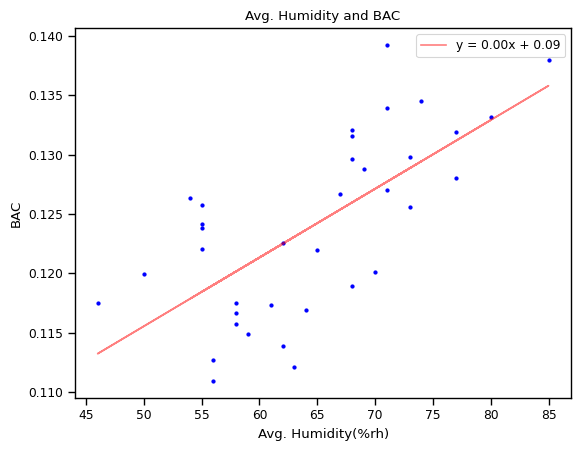

In [ ]:
# 알콜농도 - 평균습도
# DataFrame named total_df with columns 'x_column' and 'y_column'
x_data = corr_df['평균습도(%rh)']
y_data = corr_df['알콜농도']

# Create the scatterplot
plt.scatter(x_data, y_data, color='blue', marker='o', s=5)

# Create the line
m, b = np.polyfit(x_data, y_data, 1)
line_equation = f'y = {m:.2f}x + {b:.2f}'
plt.plot(x_data, m*x_data+b, color='r', alpha=0.5, label=line_equation)

plt.title('Avg. Humidity and BAC')
plt.xlabel('Avg. Humidity(%rh)')
plt.ylabel('BAC')

# Display the scatterplot
plt.legend()
plt.show()

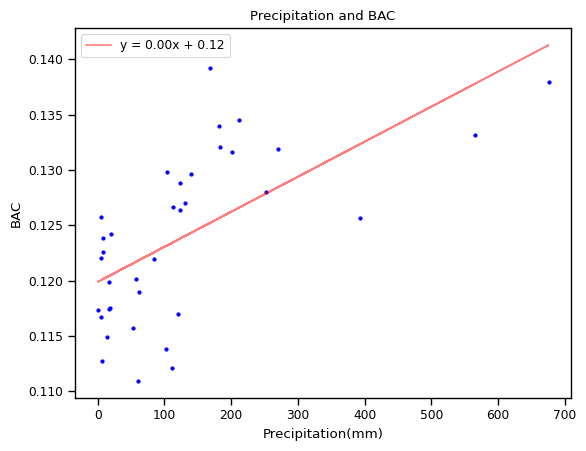

In [ ]:
# 알콜농도 - 강수량
# DataFrame named total_df with columns 'x_column' and 'y_column'
x_data = corr_df['강수량(mm)']
y_data = corr_df['알콜농도']

# Create the scatterplot
plt.scatter(x_data, y_data, color='blue', marker='o', s=5)

# Create the line
m, b = np.polyfit(x_data, y_data, 1)
line_equation = f'y = {m:.2f}x + {b:.2f}'
plt.plot(x_data, m*x_data+b, color='r', alpha=0.5, label=line_equation)

plt.title('Precipitation and BAC')
plt.xlabel('Precipitation(mm)')
plt.ylabel('BAC')

# Display the scatterplot
plt.legend()
plt.show()

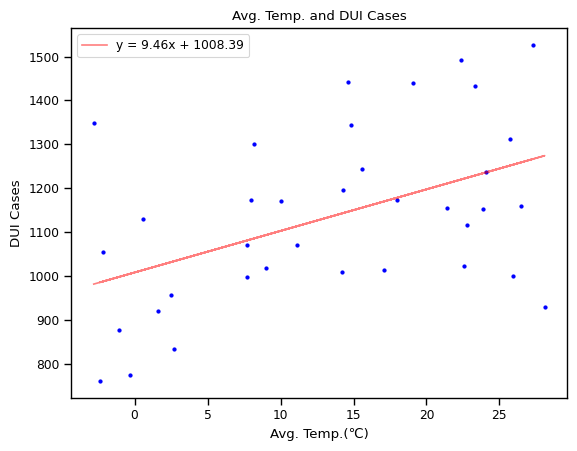

In [ ]:
# 음주적발건수 - 평균기온
# DataFrame named total_df with columns 'x_column' and 'y_column'
x_data = corr_df['평균기온(℃)']
y_data = corr_df['음주적발건수(건)']

# Create the scatterplot
plt.scatter(x_data, y_data, color='blue', marker='o', s=5)

m, b = np.polyfit(x_data, y_data, 1)
line_equation = f'y = {m:.2f}x + {b:.2f}'
plt.plot(x_data, m*x_data+b, color='r', alpha=0.5, label=line_equation)

plt.title('Avg. Temp. and DUI Cases')
plt.xlabel('Avg. Temp.(℃)')
plt.ylabel('DUI Cases')

# Display the scatterplot
plt.legend()
plt.show()

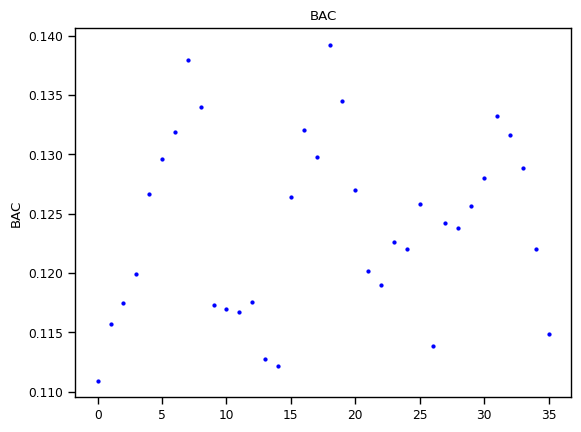

In [ ]:
# DataFrame named total_df with columns 'x_column' and 'y_column'
y_data = corr_df['알콜농도']
x_data = range(len(y_data))

# Create the scatterplot
plt.scatter(x_data, y_data, label='Scatterplot', color='blue', marker='o', s=5)

plt.title('BAC')
plt.ylabel('BAC')

# Display the scatterplot
plt.show()

#윤경님

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and direc

In [ ]:
# total data frame 다시 보기
print(total_df)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import hex2color
import numpy as np
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random

          년   월  성별   알콜농도  평균기온(℃)  평균습도(%rh)  강수량(mm)
0      2020   1   1  0.210      1.6       56.0     60.5
1      2020   1   1  0.091      1.6       56.0     60.5
2      2020   1   1  0.115      1.6       56.0     60.5
3      2020   1   1  0.119      1.6       56.0     60.5
4      2020   1   1  0.075      1.6       56.0     60.5
...     ...  ..  ..    ...      ...        ...      ...
40862  2022  12   1  0.059     -2.8       59.0     13.6
40863  2022  12   1  0.183     -2.8       59.0     13.6
40864  2022  12   1  0.078     -2.8       59.0     13.6
40865  2022  12   1  0.139     -2.8       59.0     13.6
40866  2022  12   1  0.159     -2.8       59.0     13.6

[40863 rows x 7 columns]


In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
count_by_gu = total_df['관할구'].value_counts()

# 랜덤 "관할구"
random_gu = list(count_by_gu.index)
random.shuffle(random_gu)

# 버블차트를 만든다
plt.figure(figsize=(10, 6))
plt.scatter(random_gu, count_by_gu[random_gu], s=100, alpha=0.5, c='blue', edgecolors='black')
plt.xlabel('관할구')
# x축 레이블이 겹치지 않게
plt.xticks(rotation=45)
# 그래프에 제목과 라벨을 추가합니다.
plt.title("Number of Drink-Driving Accidents in Seoul 2020-22")
plt.xlabel("District")
plt.ylabel("Number")


fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(plt.imread("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/음주운전적발기록/Seoul Map.jpeg"), extent=[0, len(x), 0, max(y)], aspect="auto", zorder=0)


plt.show()



KeyError: ignored

In [ ]:
# 데이터프레임에서 "성별" 열의 값을 카운트하여 여성과 남성의 수
gender_counts = total_df['성별'].value_counts()

# 여성과 남성의 수
female_count = gender_counts['여자']
male_count = gender_counts['남자']


labels = ['여자', '남자']
sizes = [female_count, male_count]
colors = ['pink', 'skyblue']
explode = (0.1, 0)

# 원그래프를 그립니다.
plt.figure(figsize=(6, 6))  # 그래프 크기 조절
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('여성과 남성 비율')  # 그래프 제목 설정
plt.axis('equal')  # 원 그래프를 원형으로 유지


plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/음주운전적발기록/구별 통합 20-22년 음주운전적발기록2.csv")

# 버블 차트를 그릴 데이터를 선택합니다.
x = df["구별"]
y = df["total"]

# 그래프 크기 및 뒷배경 이미지를 설정합니다.
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(plt.imread("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/음주운전적발기록/Seoul Map.jpeg"), extent=[0, len(x), 0, max(y)], aspect="auto", zorder=0)

# 데이터 포인트마다 버블을 그립니다.
for i in range(len(x)):
    ab = AnnotationBbox((i, y[i]), frameon=False, pad=0.0)
    ax.add_artist(ab)

# x축, y축 레이블 및 제목을 추가합니다.
plt.xticks(range(len(x)), x, rotation=90)
plt.xlabel("구별")
plt.ylabel("건수")
plt.title("2020-2022 구별 음주운전적발기록")

# 그래프를 출력합니다.
plt.tight_layout()

In [ ]:
temperature_data = total_df.groupby(['년', '월'])['평균기온(℃)'].mean().reset_index()

# 새로운 데이터프레임을 생성합니다.
new_df = pd.DataFrame(temperature_data)

# "년"과 "월"을 인덱스로 설정합니다.
new_df.set_index(['년', '월'], inplace=True)

# 데이터프레임을 출력하여 확인합니다.
print(new_df)


In [ ]:

구별_데이터 = [
    ('강남구', (37.5172, 127.0473), 5145),
    ('강동구', (37.5300, 127.1237), 1325),
    ('강북구', (37.6396, 127.0257), 1482),
    ('강서구', (37.5612, 126.8228), 2333),
    ('관악구', (37.4674, 126.7453), 1886),
    ('광진구', (37.5467,127.0858)')
]

# 데이터를 분리
구명, 좌표, 데이터 = zip(*구별_데이터)

# 버블 차트 그리기
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*좌표), s=데이터, alpha=0.5)

# 각 점에 구 이름 표시
for i, 구 in enumerate(구명):
    plt.annotate(구, 좌표[i], fontsize=10, ha='center')

plt.title('서울 구별 데이터 분포')
plt.xlabel('위도')
plt.ylabel('경도')
plt.show()


# Github commit

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PROJ_path = "/content/drive/MyDrive/FastCampus/Commit_Test_Folder/fc_python4"
%cd "{PROJ_path}"
%pwd

In [ ]:
!git config user.email "leesj0331@gmail.com"
!git config user.name "S-JLEE"

In [ ]:
!git status

In [ ]:
!git add Python_Project_4조.ipynb
!git commit -m "Python_Project_4조 initial commit"
!git push origin main